In [3]:
!pip3 install essentia

     |████████████████████████████████| 12.0MB 241kB/s 


In [4]:
!pip3 install madmom

     |████████████████████████████████| 20.0MB 27.6MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for madmom: filename=madmom-0.16.1-cp37-cp37m-linux_x86_64.whl size=20933977 sha256=272a7e52ed5c169a89481affb73330cf77b33e309b19c4b76ae408aa41c4bd44
  Stored in directory: /root/.cache/pip/wheels/21/0c/30/e0141aa75fb0a829ba5e1dca2be0860dc98502c1789616637d
Successfully built madmom


In [ ]:
!pip3 install mir_eval

The section below is all path dependent

In [14]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [7]:
import madmom

In [20]:
!ls 'drive/MyDrive/Bass/deviations'

billieJean_iec_stem.csv      billieJean_sop_student1.csv
billieJean_iec_student1.csv  billieJean_sop_student2.csv
billieJean_iec_student2.csv  billieJean_sop_student3.csv
billieJean_iec_student3.csv  billieJean_sop_student4.csv
billieJean_iec_student4.csv  billieJean_sop_student5.csv
billieJean_iec_student5.csv  billieJean_sop_student6.csv
billieJean_iec_student6.csv  billieJean_sop_student7.csv
billieJean_iec_student7.csv  billieJean_sop_student8.csv
billieJean_iec_student8.csv  bjean
billieJean_sop_stem.csv


In [8]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy

In [9]:
import mir_eval
from mir_eval import *

In [30]:
!ls drive/MyDrive/Bass/statistics

StemStatistics_IEC_billieJean.csv   StemStatistics_SOP_yellow.csv
StemStatistics_IEC_brown.csv	    StudentStatistics_IEC_brown.csv
StemStatistics_IEC_justlooking.csv  StudentStatistics_IEC_justlooking.csv
StemStatistics_IEC_yellow.csv	    StudentStatistics_IEC_Yellow.csv
StemStatistics_SOP_billieJean.csv   StudentStatistics_SOP_brown.csv
StemStatistics_SOP_brown.csv	    StudentStatistics_SOP_yellow.csv
StemStatistics_SOP_justlooking.csv


In [26]:
deviatePath = 'drive/MyDrive/Bass/deviations/billieJean_iec_stem.csv'
col_list = ["onset dev", "offset dev"]
df = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = df["onset dev"].tolist()   
offset_dev_list = df["offset dev"].tolist()     

In [41]:
statsPath = 'drive/MyDrive/Bass/statistics/AllStatistics_IEC_Yellow.csv'

statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [42]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark
0,0,0.938462,0.938462,0.938462,0.003963,0.0005,0.005113,0.054438,-0.014543,0.10914,100,100,100,100,100,5.0
1,1,0.400000,0.364000,0.381000,0.010000,0.0000,0.011000,0.054000,0.052000,0.18900,85,85,70,85,85,4.0
2,2,0.527000,0.545000,0.536000,0.009000,-0.0020,0.010000,0.019000,-0.005000,0.03100,55,70,70,70,70,3.0
3,3,0.210000,0.199000,0.205000,0.011000,-0.0040,0.012000,0.030000,-0.005000,0.04900,70,85,85,85,100,4.0
4,4,0.163000,0.164000,0.164000,0.011000,0.0040,0.012000,0.043000,0.038000,0.10400,70,85,85,85,85,4.0
5,5,0.223000,0.220000,0.221000,0.010000,-0.0010,0.011000,0.024000,0.003000,0.03700,85,85,70,85,85,3.0
6,6,0.334000,0.336000,0.335000,0.009000,0.0060,0.011000,0.058000,0.041000,0.18600,85,100,100,85,100,4.5
7,7,0.088000,0.091000,0.089000,0.011000,-0.0060,0.012000,0.226000,-0.226000,0.30100,85,85,85,55,70,2.0
8,8,0.238000,0.252000,0.244000,0.009000,0.0000,0.010000,0.167000,-0.151000,0.37900,55,70,85,70,85,3.0


In [49]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(onset_mean_list)
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

[0.000499858, 0.0, -0.002, -0.004, 0.004, -0.001, 0.006, -0.006, 0.0]


In [23]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,student_grades,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   
   #k = 0 # First student
   plt.subplot(2,2,1)

   print(type(deviationsArray1))
   a = np.array(deviationsArray1[k])
   print(type(a))
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student " + str(k+1)+ title_text1

   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = np.array(deviationsArray2[k])
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k+1)+ title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()
   print("Onset Grade = ", student_grades[k][0],"\t" ,"Offset Grade = ", student_grades[k][1])
   print("\n")
   print(onset_summary)
   print("\n")
   print(offset_summary)
   print("\n")
   print("Articulation Grade = ", student_grades[k][2],"Sound Q Grade = ", student_grades[k][3], "Volume Control Grade = ", student_grades[k][4])
   print("Final Mark = ", student_grades[k][5])

In [ ]:
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",the_student_grades,0)


In [ ]:
k=0
# sonset_deviations,soffset_deviations,
while k<8:
   multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",the_student_grades,k)
   k+=1


In [ ]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# multiple_hist3(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def multiple_hist3(deviationsArray1,deviationsArray2,title_text1,title_text2,student_grades,sp,sr,sf):
   header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
   with open('drive/MyDrive/Bass/data/StudentStatistics.csv', 'w', encoding='UTF8') as f:
      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []

      for k in range(len(the_student_grades)):
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k+1)+ title_text1

          onset_X.append( student_grades[k][0])  # Martis mark
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k+1)+ title_text2

          duration_X.append( student_grades[k][0])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", student_grades[k][0],"\t" ,"Duration Grade = ", student_grades[k][1])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("Articulation Grade = ", student_grades[k][2],"Sound Control Grade = ", student_grades[k][3], "Volume Control Grade = ", student_grades[0][4])
          print("Final Mark = ", student_grades[k][5])
          studentStatistics = []
          studentStatistics.append(str(k+1))
          studentStatistics.append(round(sp[k],3))
          studentStatistics.append(round(sp[k],3))
          studentStatistics.append(round(sp[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(student_grades[k][0])
          studentStatistics.append(student_grades[k][1])
          studentStatistics.append(student_grades[k][2])
          studentStatistics.append(student_grades[k][3])
          studentStatistics.append(student_grades[k][4])
          studentStatistics.append(student_grades[k][5])
          # write the data
          writer.writerow(studentStatistics)

   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std)
# Capture a table of onset and grade


In [ ]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= multiple_hist3(sonset_deviationsArray,soffset_deviationsArray," onsets", " offset",the_student_grades,sp,sr,sf)

In [ ]:
plt.plot(onset_X, onset_mean,'x')
plt.show()
plt.plot(onset_X, onset_std,'x')
plt.show()

In [ ]:
aggregate_hist_and_stats(sduration_deviationsArray,"Student Deviations")

In [ ]:

#################
i1=fs*4
i2= fs*12
r= raw_audio[0][i1:i2]
stud = student_audio[0][i1:i2]
plt.plot(np.arange(r.size)/float(fs), r,'b')

plt.plot(np.arange(stud.size)/float(fs), stud,'y')
plt.axis([0,r.size/float(fs),min(r),max(r)])
#for i in onsetIndexArray[0]:
#    plt.axvline(x=i, color='red')
plt.title("Student (y) Stem (b)")
plt.show()

In [ ]:
std1_note_onset_grade = 85 
#En esta pista la "Note Onset Security" es muy precisa. Solamente algunos desajustes un poco mas notables en el Chorus.
# El groove principal estÃ¡ muy bien.
std1_note_duration = 85 
std1_note_articulate = 70
std1_sound_quality = 85 # 'very good'
std1_note_dynamics  = 85
std1_note_global = 80


In [ ]:
import pandas as pd
print(len(duration_deviationsArray))

In [ ]:
data_timing_duration0= { 'durations0' :duration_deviationsArray[0]}
data_timing_onset0= { 'onsets0' :duration_deviationsArray[0]}


In [ ]:
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()


In [ ]:
import numpy as np
#from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Y	= np.array([100,	85,	55,	70,	70,	85,	85,	85,	55] )

#Train model
# ABS MEAN


#X1	=np.array([0.027407,	0.026,	0.016,	0.026,	0.034,	0.023,	0.027,	0.031,	0.025]).reshape((-1, 1))
#X2= 	np.array( [1	,45,	13,	88,	115	,90,	50,	42,	60]).reshape((-1, 1))


In [ ]:
Student	= [0,1,2,3,4,5,6,7,8]
x_precision		= [0.996,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_recall		= [0.958,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_f_measure_value		= [0.977,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_Onset_ABS_Mean	= [	0.027407,0.026,0.016,0.026,0.034,0.023,0.027,0.031,0.025]
x_Onset_Mean	= [	0.027407,0.017,0.003,-0.018,0.005,-0.001,0.027,-0.029,-0.001]
x_Onset_Std		= [0.031882,0.031,0.022,0.031,0.037,0.028,0.032,0.036,0.029]


x_Duration_ABS_Mean		= [0.038446,0.027,0.04,0.036,0.041,0.033,0.038,0.051,0.04]
x_Duration_Mean	=[	0.00571,0.014,-0.033,-0.023,-0.02,-0.017,0.006,-0.02,-0.01]
x_Duration_Std		= [0.045769,0.035,0.046,0.043,0.048,0.04,0.046,0.054,0.047]

In [57]:
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	
Student	= [0,1,2,3,4,5,6,7,8]
Student = df_all["Student"].tolist()   
x_precision		= [0.996,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_precision = df_all["precision"].tolist()  
x_recall		= [0.958,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_recall = df_all["recall"].tolist()  
x_f_measure_value		= [0.977,0.802,0.885,0.488,0.44,0.553,0.759,0.482,0.617]
x_f_measure_value = df_all["f_measure_value"].tolist()  
x_Onset_ABS_Mean	= [	0.027407,0.026,0.016,0.026,0.034,0.023,0.027,0.031,0.025]
x_Onset_ABS_Mean = df_all["Onset ABS Mean"].tolist()  
x_Onset_Mean	= [	0.027407,0.017,0.003,-0.018,0.005,-0.001,0.027,-0.029,-0.001]
x_Onset_Mean = df_all["Onset Mean"].tolist()  
x_Onset_Std		= [0.031882,0.031,0.022,0.031,0.037,0.028,0.032,0.036,0.029]
x_Onset_Std = df_all["Onset Std"].tolist()  


x_Duration_ABS_Mean		= [0.038446,0.027,0.04,0.036,0.041,0.033,0.038,0.051,0.04]
x_Duration_ABS_Mean = df_all["Duration ABS Mean"].tolist()  
x_Duration_Mean	=[	0.00571,0.014,-0.033,-0.023,-0.02,-0.017,0.006,-0.02,-0.01]
x_Duration_Mean = df_all["Duration Mean"].tolist()  
x_Duration_Std		= [0.045769,0.035,0.046,0.043,0.048,0.04,0.046,0.054,0.047]
x_Duration_Std = df_all["Duration Std"].tolist()  
#Articulation Y  conisder X onset infor and X offsetr info

# Final Y conisder X onset infor and X offset info
# You can take all coumns 

#onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

# For these 4 Y values create separet Linear regression Models
# Fluencey = Timing + Pitch in Trinity
# Y1
y_onsetMark		=array( [100,85,55,70,70,85,85,85,55])
y_onsetMark		= df_all["Duration Std"].tolist()  
# Y2
y_DurationMark		=array( [100,85,70,85,85,85,100,85,70])
y_DurationMark		= df_all[" DurationMark"].tolist()  
# Then you have Technh¡'ical focus.

# rhythm  everything   Duration Mean 	Duration Std 	
#Y3 articulation TF
y_articulationMark	=array( [100,70,70,85,85,70,100,85,85])
y_articulationMark	=  df_all[" articulationMark "].tolist() 




################"soundQualityMark","volumeControlMark"########################################################33
#
y_soundQualityMark		= array([100,85,70,85,85,85,85,55,70])
y_soundQualityMark		= df_all["soundQualityMark"].tolist()
y_volumeControlMark		= array([100,85,70,100,85,85,100,70,85])
y_volumeControlMark		= df_all["volumeControlMark"].tolist()
y_finalMark		=  array([5,4,3,4,4,3,4.5,2,3])
y_finalMark		=  df_all[" finalMark"].tolist() 

X= array([x_precision,	x_recall	,x_f_measure_value	,x_Onset_ABS_Mean,x_Onset_Mean,x_Onset_Std,x_Duration_ABS_Mean,x_Duration_Mean,x_Duration_Std])
print(X.shape)
Xnew= X.transpose()

(9, 9)


In [ ]:

X = Xnew[:, np.newaxis, 3]
print(X)

In [62]:
from sklearn import linear_model

y = y_onsetMark
# Split the data into training/testing sets
X_train = X[:-5]
X_test = X[-5:]

# Split the targets into training/testing sets
y_train = y[:-5]
y_test = y[-5:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())
plt.show()

Coefficients: 
 [-14.892622   24.070356   -1.0169766 -29.975222  -24.401022   17.780228
  -4.3757496  22.359966   46.7418   ]


NameError: ignored

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


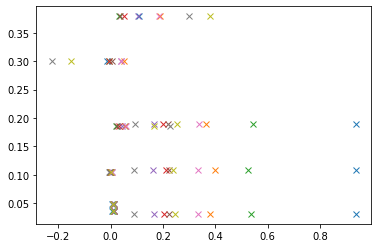

Coefficients: 
 [-23.029951  34.91157   35.997116 -89.13785  -21.91992   60.18738
  -4.413988  11.484025  -8.208737]


NameError: ignored

In [67]:
reg = linear_model.LinearRegression().fit(Xnew, y)
print(reg)
##################### Load the diabetes dataset
######################################
#regr.fit(diabetes_X_train, diabetes_y_train)
regr.fit(X, y)
y_pred = regr.predict(X)
plt.plot(X,y, 'x')
plt.show()
									
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean absolute error
print('Mean abs  error: %.2f'      % mean_absolute_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, y_pred))
plt.plot(X2,Y, 'x')
plt.show()
plt.xticks(())
plt.yticks(())
plt.show()

In [68]:
print(X.shape)
X_new = X.transpose()
print(X_new.shape)

(9, 9)
(9, 9)


In [69]:
from sklearn.model_selection import LeaveOneOut
#X = np.array([[1, 2], [3, 4]])
X= array([x_precision,	x_recall	,x_f_measure_value	,x_Onset_ABS_Mean,x_Onset_Std,x_Duration_ABS_Mean,x_Duration_Std])

y = y_finalMark #np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)
for train_index, test_index in loo.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     print(X_train, X_test, y_train, y_test)
"""
TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
# Use only one feature
#X = X[:, np.newaxis, 2]
"""




LeaveOneOut()
TRAIN: [1 2 3 4 5 6] TEST: [0]


TypeError: ignored

In [70]:
print(len(X))
print(len(X[0]))
print(type(X))

7
9
<class 'numpy.ndarray'>


Coefficients: 
 [0.9034423]
[[0.199]
 [0.205]
 [0.011]
 [0.012]
 [0.03 ]
 [0.049]] [4.0, 3.0, 4.0, 4.0, 3.0, 4.5, 2.0]
[[0.199]
 [0.205]
 [0.011]
 [0.012]
 [0.03 ]
 [0.049]] [4.0159473 4.021368  3.8461    3.8470037 3.8632655 3.880431  3.880431 ]


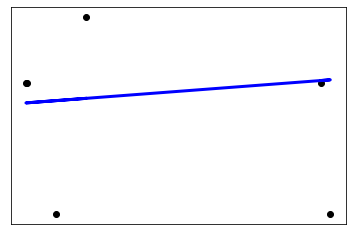

In [74]:
# Split the data into training/testing sets
X= array([x_precision,	x_recall	,x_f_measure_value	,x_Onset_ABS_Mean,x_Onset_Std,x_Duration_ABS_Mean,x_Duration_Std])

y = y_finalMark #np.array([1, 2])
# Use only one feature
X = X[:, np.newaxis, 3]


# Split the targets into training/testing sets
"""
X_train =X[0:4]
X_test = X[4:8]

# Split the targets into training/testing sets
y_train = y[0:4]
y_test = y[4:8]
"""
# Split the data into training/testing sets
X_train =X[0:7]
X_test = X[1:8]

# Split the targets into training/testing sets
y_train = y[0:7]
y_test = y[1:8]
#print(X_train,X_test,y_train,y_test)
# Create linear regression object
regr = linear_model.LinearRegression()


#print((X_train),(y_train))

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
##HACK!
#print(y_test, type(y_pred))
y_pred=np.append(y_pred,y_pred[len(y_pred)-1])
# The coefficients
print('Coefficients: \n', regr.coef_)


#print('Mean abs error: %.2f'    % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

# Plot outputs
print((X_test),(y_test))
plt.scatter(X_test, y_test[0:len(y_test)-1],  color='black')
print((X_test),(y_pred))
plt.plot(X_test, y_pred[0:len(y_pred)-1], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [75]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)


xp = 	[0.996	,0.802,	0.885,	0.488	,0.44	,0.553,	0.759,	0.482	,0.617]
xr= [0.958,	0.802,	0.885,	0.488,	0.44,	0.553,	0.759,	0.482,	0.617]
xf = 	[0.977,	0.802,	0.885,	0.488,	0.44,	0.553,	0.759,	0.482,	0.617]
Y	= [100,	85,	55,	70,	70,	85,	85,	85,	55]
print(type(X[2]))



<class 'numpy.ndarray'>


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!ls 

In [77]:
dataset = pd.read_csv('drive/MyDrive/Bass/StudentStatistics_BillieJean.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
print(X.shape)
y=array(dataset['onsetMark'])

regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
y_pred = regressor.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
df

In [78]:
Xd = dataset[['P', 'R', 'F',  ' ABS Mean Duration','Mean Duration','Std Duration']]
print(X.shape)
yd=array(dataset['Duration'])
regressor = LinearRegression()
regressor.fit(Xd_train, yd_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
yd_pred = regressor.predict(X_test)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(Xd_train, yd_train)
y_pred = regressor.predict(Xd_test)
df = pd.DataFrame({'Actual': yd_test, 'Predicted': yd_pred})
df

KeyError: ignored

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yd_test, yd_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Bass/StudentStatisticsInput.csv')